# EDA
Automatic EDA using ydata-profiling

# User params

In [1]:
file_name = "merged_dataset.parquet"
max_samples = 5_000

# Imports

In [2]:
import os
import pandas as pd
from ydata_profiling import ProfileReport
from src.utils.io.io import load_dataframe

In [3]:
base_folder = os.path.join('..', 'data', 'raw')
output_folder = os.path.join('..', 'data', 'output')

# create paths
file_path = os.path.join(base_folder, file_name)
profiling_path = os.path.join(output_folder, file_name.split('.')[0]+"_profiling.html")

# read json file into dataframe
df = load_dataframe(file_path)
print(f"Dataset shape: {df.shape}")

# display
display(df.head(1))


2024-08-07 14:14:33,998 - src.config - DEBUG - calling load_dataframe
2024-08-07 14:14:34,000 - src.config - INFO - Current working directory: c:\Users\alexi\WORKSPACE\interview_abwaab\ReviewOutliers\notebooks


,rating,title_review,text,images_review,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,description,price,images_metadata,videos,store,categories,details,bought_together,subtitle,author
0,5.0,Work great,work great. use a new one every month,[],B01N0TQ0OH,B01N0TQ0OH,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1519317108692,0,True,...,[],9.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Mr Coffee Water Filter Instruction...,Geesta,"[Small Appliance Parts & Accessories, Coffee &...","{""Manufacturer"": ""Geesta"", ""Part Number"": ""Gee...",None,None,None


# Automated analysis : Report

In [14]:
# review report
df_to_analyze = df.sample(max_samples)
df_to_analyze['price'] = pd.to_numeric(df_to_analyze['price'], errors='coerce')
df_to_analyze['rating'] = pd.to_numeric(df_to_analyze['rating'], errors='coerce')

profile_review = ProfileReport(df_to_analyze, title="Profiling Report", minimal=False)
profile_review.to_file(profiling_path)

2024-08-07 14:43:17,787 - urllib3.connectionpool - DEBUG - Starting new HTTPS connection (1): packages.ydata.ai:443
2024-08-07 14:43:18,991 - urllib3.connectionpool - DEBUG - https://packages.ydata.ai:443 "GET /ydata-profiling?version=v4.9.0&python_version=3.12&report_type=regular&dataframe=spark&datatype=tabular&os=Windows&gpu=False HTTP/11" 200 None


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\site-packages\ydata_profiling\model\pandas\summary_pandas.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  series = series.fillna(np.nan)
c:\Users\alexi\AppData\Local\pypoetry\Cache\virtualenvs\reviewoutliers-SwZO3ms--py3.12\Lib\sit

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

2024-08-07 14:53:26,368 - matplotlib.colorbar - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001C1D81B8260>


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Interactive Analysis

In [6]:
# from pivottablejs import pivot_ui
# pivot_ui(df)

# from pandasgui import show
# show(df)

# import tabloo
# tabloo.show(df)

# import dtale
# dtale.show(df)

# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)
# from itables import show
# show(df, buttons=["copyHtml5", "csvHtml5", "excelHtml5"])

# import pygwalker as pyg
# walker = pyg.walk(df)

# ipyaggrid

# import qgrid
# widget = qgrid.show_grid(df_to_analyze)

# Manual Analysis

In [21]:
df_to_analyze.columns

Index(['rating', 'title_review', 'text', 'images_review', 'asin',
       'parent_asin', 'user_id', 'timestamp', 'helpful_vote',
       'verified_purchase', 'main_category', 'title_metadata',
       'average_rating', 'rating_number', 'features', 'description', 'price',
       'images_metadata', 'videos', 'store', 'categories', 'details',
       'bought_together', 'subtitle', 'author', 'list_length_features',
       'list_length_description', 'list_length_categories',
       'list_length_details'],
      dtype='object')

In [38]:
%matplotlib inline
def plot_counts(df, col_name: str) -> None:
    '''
    hist and stats on col that have arrays of str
    '''
    len_col = 'list_length_'+col_name
    print(f"Data type: {type(df[col_name].iloc[0])}")
    
    # check the length of the list
    df[len_col] = df[col_name].apply(len)
    print("Counts : ", df[len_col].value_counts()[:4])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(3, 2))
    plt.hist(df[len_col], bins=range(1, df[len_col].max() + 2), edgecolor='black')
    plt.xlabel('Length of List')
    plt.ylabel('Frequency')
    plt.title('Histogram of List Lengths')
    plt.show()

    # examples of len 1
    try:
        print("examples of len 1")
        display(df[df[len_col] == 1][col_name].sample(2))
    except:
        pass

    # examples of len superior to 1
    try:
        list_samples = df[df[len_col] > 1][col_name].sample(1).to_list()
        print("example of len > 1 : ", list_samples[0])
    except:
        pass
    
    

2024-08-07 15:28:27,070 - matplotlib.pyplot - DEBUG - Loaded backend inline version unknown.


Data type: <class 'numpy.ndarray'>
Counts :  list_length_features
5    2616
4     524
3     460
6     295
Name: count, dtype: int64


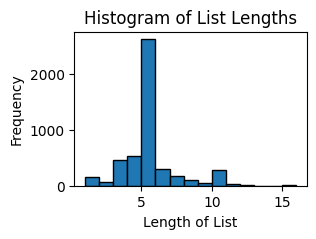

examples of len 1


206912    [Kenmore He3t He4t 5t Washer water Pump 818168...
270321                 [This is a genuine replacement part]
Name: features, dtype: object

example of len > 1 :  ['Alternate part numbers include AP5177961, 1974291, AH3493633, EA3493633, and PS3493633.'
 'Measures 9-7/8 x 6-1/2 inches | Fits model specific dryers'
 'The filter may be located on the top of your dryer, or inside the dryer door depending on your model. When replacing the filter, take the time to ensure all dust and lint has been removed from the lint filter area. The filter should be cleared of debris after each dryer cycle.'
 'Supplying Demand replacement parts are compatible with Major Brands, but you should always verify fitment with your specific model. We have included a video in the product gallery to help you find your model number and information in the description below.'
 'SD products come in Supplying Demand packaging.']


In [39]:
plot_counts(df_to_analyze, 'features')

Data type: <class 'numpy.ndarray'>
Counts :  list_length_description
0    2116
1    1255
4    1075
2     109
Name: count, dtype: int64


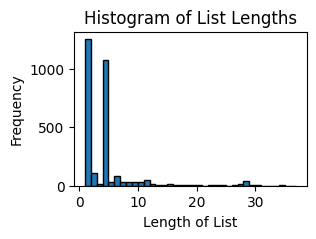

examples of len 1


229139    [8268383 Dishwasher Chopper. The chopper chops...
47599     [For dryers, bathroom vents, and range hoods. ...
Name: description, dtype: object

example of len > 1 :  ['Product Description'
 'This high quality LG OEM EAD40521449 Power Cord for LG brand Washing Machines is manufactured to exact specifications with durable materials. The Power Cord and fits into standard 3-prong outlets and has approximately a 72" length. Please be aware that all utilities should be disconnected from your Washing Machine Appliance prior to replacing the Power Cord.'
 'From the Manufacturer'
 'LG EAD40521449 Washing Machine Power Cord Assembly. For use with the following LG Electronics models: WM2140CW, WM2450HRA, WM2550HRCA, WM2550HWCA, WM2701HV, WM3070HWA, WM3150HVC, WM3150HWC, WM3550HVCA, WM3875HVCA, WM3875HWCA, WM3885HCCA, WM3885HWCA, WM8000HVA, WM8000HWA. Refer to your manual to ensure ordering the correct, compatible part.']


In [40]:
plot_counts(df_to_analyze, 'description')

In [41]:
display(df_to_analyze['images_metadata'].iloc[0])

{'hi_res': array([None], dtype=object),
 'large': array(['https://m.media-amazon.com/images/I/414suDcQziL._AC_.jpg'],
       dtype=object),
 'thumb': array(['https://m.media-amazon.com/images/I/414suDcQziL._AC_US75_.jpg'],
       dtype=object),
 'variant': array(['MAIN'], dtype=object)}

Data type: <class 'numpy.ndarray'>
Counts :  list_length_categories
4    3758
2     619
3     616
5       7
Name: count, dtype: int64


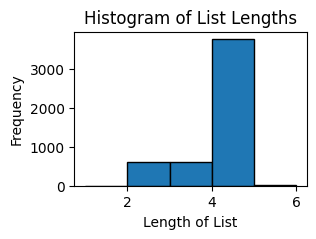

examples of len 1
example of len > 1 :  ['Appliances' 'Parts & Accessories' 'Washer Parts & Accessories']


In [42]:
plot_counts(df_to_analyze, 'categories')

Data type: <class 'str'>
Counts :  list_length_details
2      68
553    53
875    47
532    42
Name: count, dtype: int64


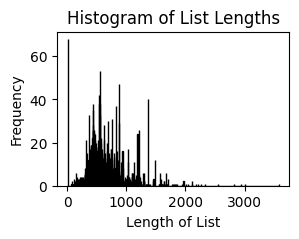

examples of len 1
example of len > 1 :  {"Manufacturer": "Samsung", "Part Number": "DA61-03571A", "Item Weight": "0.32 ounces", "Product Dimensions": "2 x 3 x 1 inches", "Item model number": "DA61-03571A", "Is Discontinued By Manufacturer": "No", "Finish": "Unfinished", "Item Package Quantity": "1", "Mounting Type": "Face Mount", "Included Components": "Appliance-replacement-parts", "Batteries Included?": "No", "Batteries Required?": "No", "Best Sellers Rank": {"Tools & Home Improvement": 412597, "Refrigerator Replacement Shelves": 589}, "Date First Available": "June 8, 2016", "Brand": "SAMSUNG", "Item Dimensions LxWxH": "2 x 3 x 1 inches", "Finish Type": "Unfinished", "Unit Count": "1.0 Count"}


In [43]:
plot_counts(df_to_analyze, 'details')

In [44]:
# plot_counts('bought_together')
display(df_to_analyze['bought_together'].iloc[0])

None

# Information from the documentation


- Pure IDs (0-Core): Complete dataset
- Pure IDs (5-Core): 
    - Each user must have rated at least 5 different items.
    - Each item must have been rated by at least 5 different users.

# Conclusion

## Overall


## Metadata

- `main_category`(str - categorical): could be considered categorical
- `title` (str): text
- `average_rating` (float): numerical
- `rating_number` (int): numerical
- `store` (str): names of shops could be considered categorical data
- `parent_asin`(str - ID): unique string identifier
- `features`(list of str): could be concatenated
- `categories`: (list of str): product category path. could be spread on several columns or concatenated
- `description` (list of str): mostly empty
- `details` (dict str - str): various product details
- `price` (float): subscription boxes had empty prices. rest are ok

To drop:
- `images` (list of str): too complex
- `videos` (list of str): too complex
- `bought_together` (boolean): mostly empty
- other that are category specific : `author`, `subtitle`, ...


Notes : 
- no duplicate rows

## Review

- `rating`: numerical
- `title`: text
- `text`: text
- `asin`: unique string identifier
- `parent_asin`: unique string identifier
- `user_id`: unique string identifier
- `timestamp`: numerical
- `helpful_vote`: numerical
- `verified_purchase`: boolean

To drop:
- `images`: list of image URLs. -> dropped

Notes : 
- there are duplicate rows / aka reviews. -> Drop duplicates
